# Logistic Regression
Output variable->y y-> Whethere the client has subscribe a term deposit or not Binomial ("yes" or "no")

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as smf
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

In [9]:
data=pd.read_csv('C:/Users/hride/OneDrive/Desktop/Downloads/bank-full.csv', sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
data1=data.drop(["day"],axis=1)
data1

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,508,4,-1,0,unknown,no


In [12]:
data2=data1.drop(['month'],axis=1)
data2

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [13]:
label=preprocessing.LabelEncoder()
data2['job']=label.fit_transform(data.job)
data2['marital']=label.fit_transform(data.marital)
data2['education']=label.fit_transform(data.education)
data2['default']=label.fit_transform(data.default)
data2['housing']=label.fit_transform(data.housing)
data2['loan']=label.fit_transform(data.loan)
data2['contact']=label.fit_transform(data.contact)
data2['poutcome']=label.fit_transform(data.poutcome)
data2['y']=label.fit_transform(data.y)
data2

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,508,4,-1,0,3,0


In [14]:
data2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
data2.describe()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


C:\Users\hride\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

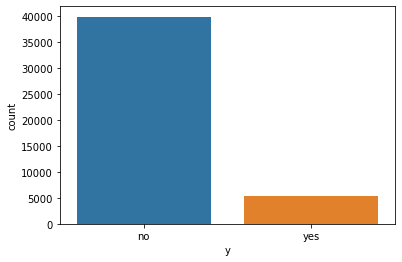

In [16]:
sns.countplot(data.y)

<AxesSubplot:xlabel='y'>

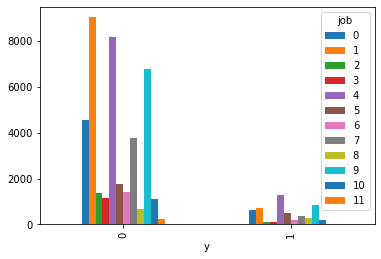

In [17]:
pd.crosstab(data2.y,data2.job).plot(kind='bar')

In [18]:
pd.crosstab(data2.y,data2.marital)

marital,0,1,2
y,,,
0,4585,24459,10878
1,622,2755,1912


In [19]:
pd.crosstab(data2.y,data2.education)

education,0,1,2,3
y,,,,
0,6260,20752,11305,1605
1,591,2450,1996,252


In [20]:
x=data2.iloc[:,0:14]
x

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,508,4,-1,0,3


In [21]:
y=data2.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [22]:
model=LogisticRegression()
model.fit(x,y)

C:\Users\hride\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.coef_

array([[-2.94456822e-02,  3.12694603e-02, -1.59841939e-01,
        -4.28973766e-02, -6.66921651e-03,  5.85101538e-06,
        -2.45935987e-01, -6.74649003e-02, -2.73372789e-01,
         3.63952833e-03, -3.59572809e-01, -1.40053621e-03,
         1.15190731e-01, -2.76966646e-01]])

In [24]:
model.predict_proba(x)

array([[0.95049147, 0.04950853],
       [0.9486273 , 0.0513727 ],
       [0.95219494, 0.04780506],
       ...,
       [0.59925107, 0.40074893],
       [0.93372541, 0.06627459],
       [0.49947003, 0.50052997]])

In [25]:
y_pred=model.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
data2['y_pred']=y_pred
data2

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,977,3,-1,0,3,1,1
45207,71,5,0,0,0,1729,0,0,0,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,508,4,-1,0,3,0,0


In [27]:
con_mat=confusion_matrix(y,y_pred)
con_mat

array([[39120,   802],
       [ 4262,  1027]], dtype=int64)

In [28]:
pd.crosstab(y,y_pred)

col_0,0,1
y,,
0,39120,802
1,4262,1027


In [29]:
accuracy=sum(y==y_pred)/data2.shape[-2]
accuracy

0.8879918603879586

In [30]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [31]:
roc_score=roc_auc_score(y,y_pred)
roc_score

0.5870437095198181

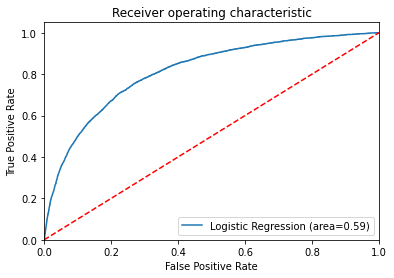

In [32]:
fpr, tpr, thresholds = roc_curve(y,model.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
model2=smf.Logit(y,x)

In [34]:
model2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.277175
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           13
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                  0.2319
Time:                        21:49:11   Log-Likelihood:                -12531.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0254      0.001    -20.459      0.000      -0.028      -0.023
job           -0.0177      0.005     -3.447      0.001      -0.028      -0.008
marital       -0.2102      0.026     -8.184      0.000      -0.261      -0.160
education      0.0181      0.022      0.818      0.413      -0.025       0.061
default       -0.4219      0.159     -2.657      0.008      -0.733      -0.111
balance     2.009e-05   4.52e-06      4.447      0.000    1.12e-05     2.9e-05
housing       -1.2798      0.036    -35.673      0.000      -1.350      -1.209
loan          -0.8335      0.056    -14.813      0.000      -0.944      -0.723
contact       -0.5823      0.026    -22.565      0.000      -0.633      -0.532
duration       0.0038   5.99e-05     63.136      0.000       0.004       0.004
campaign      -0.1807      0.010    -17.264      0.000      -0.201      -0.160
pdays       8.798e-05      0.000      0.390      0.696      -0.000       0.001
previous       0.0537      0.008      6.771      0.000       0.038       0.069
poutcome      -0.2523      0.022    -11.679      0.000      -0.295      -0.210
==============================================================================
"""

# From above accuracies and other parameters for cross validation data we can comclude it is performing well